In [135]:
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from dataset import load_hoda
import matplotlib.pyplot as plt

# Read the input image (make sure it's a binary image)
image = cv2.imread('persian-digits.jpg', cv2.IMREAD_GRAYSCALE)


In [137]:
X_train, y_train, X_test, y_test = load_hoda()

In [139]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

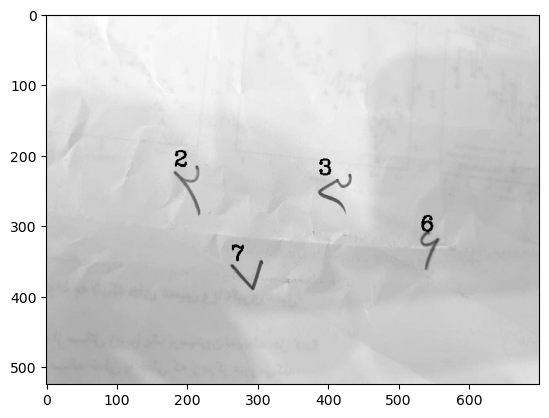

In [141]:
# Apply thresholding to create a binary image
_, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY)
binary_image = 255-binary_image

# Use connectedComponentsWithStats to obtain labels and bounding boxes
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

# Iterate through each connected component
for label in range(1, num_labels):
    # Get the bounding box of the current connected component
    x, y, w, h = stats[label][:4]

    # Remove points in it
    if(w>5 and h>5):
        
        # Crop the connected component using the bounding box
        connected_component = binary_image[y:y+h, x:x+w]
   
        # Resized each target for predict
        resized=cv2.resize(connected_component,(5,5))
        X=resized.reshape(1,25)

        # Write predicted number in the image
        cv2.putText(image, str(neigh.predict(X)[0]) , (x,y), cv2.FONT_HERSHEY_COMPLEX, 1, (0,170,0), 2)

#Display image with predicted numbers
plt.imshow(image,cmap='gray')